<a href="https://colab.research.google.com/github/kaktys21/python-for-DataScience_geekbrains/blob/main/kaggle_geekbrains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортеры всего, что только можно


In [232]:
import pandas as pd
import numpy as np
import matplotlib
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')



In [259]:
data_path = r'/content/drive/MyDrive/kaggle_data'
test_file = 'test.csv'
train_file = 'train.csv'
sample = 'sample_submission.csv'

Функции для моделек и подготовке данных

In [112]:
def dropper(X, dropping: list):
  return X.drop(dropping, 1)

In [230]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [251]:
def dummy_maker(X):

  binary_to_numbers = {'A': 0, 'B': 1}

  X['Ecology_2'] = X['Ecology_2'].replace(binary_to_numbers)
  X['Ecology_3'] = X['Ecology_3'].replace(binary_to_numbers)
  X['Shops_2'] = X['Shops_2'].replace(binary_to_numbers)
  return X

In [252]:
train_data = pd.read_csv(os.path.join(data_path, train_file))
X = train_data[train_data.keys()[:-1]]
Y = train_data['Price']
X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B


Унифицируем типы данных

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Три объекта object - Ecology_2, Ecology_3, Shops_2

In [253]:
X = dummy_maker(X)

Можно воспринимать категориальными - заменяем A на 0, B на 1

In [254]:
X

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,NaN,0,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,1,1,264,0,NaN,0,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,NaN,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,NaN,1,9,1
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,1,1,2,629,1,NaN,0,0,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,NaN,1,5,1
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1


Разбиваем данные для модели

In [255]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

Разбили данные

Для начала, заполним нули и попробуем модельку на исходных данных

In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6391 to 789
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7500 non-null   int64  
 1   DistrictId     7500 non-null   int64  
 2   Rooms          7500 non-null   float64
 3   Square         7500 non-null   float64
 4   LifeSquare     5938 non-null   float64
 5   KitchenSquare  7500 non-null   float64
 6   Floor          7500 non-null   int64  
 7   HouseFloor     7500 non-null   float64
 8   HouseYear      7500 non-null   int64  
 9   Ecology_1      7500 non-null   float64
 10  Ecology_2      7500 non-null   int64  
 11  Ecology_3      7500 non-null   int64  
 12  Social_1       7500 non-null   int64  
 13  Social_2       7500 non-null   int64  
 14  Social_3       7500 non-null   int64  
 15  Healthcare_1   3940 non-null   float64
 16  Helthcare_2    7500 non-null   int64  
 17  Shops_1        7500 non-null   int64  
 18  Shops_

Есть нули в LifeSquare, Healthcare_1

У второго параметра в целом очень мало заполненного, поэтому можно его дропнуть на трейне и тесте

Нули первого заполним средними

In [238]:
X_train = dropper(X_train, ['Healthcare_1'])
X_test = dropper(X_test, ['Healthcare_1'])

In [240]:
X_train['LifeSquare'].fillna(X_train['LifeSquare'].mean(), inplace=True)
X_test['LifeSquare'].fillna(X_train['LifeSquare'].mean(), inplace=True)

RanfomForest

In [245]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')

In [247]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

Train R2:	0.961
Test R2:	0.736


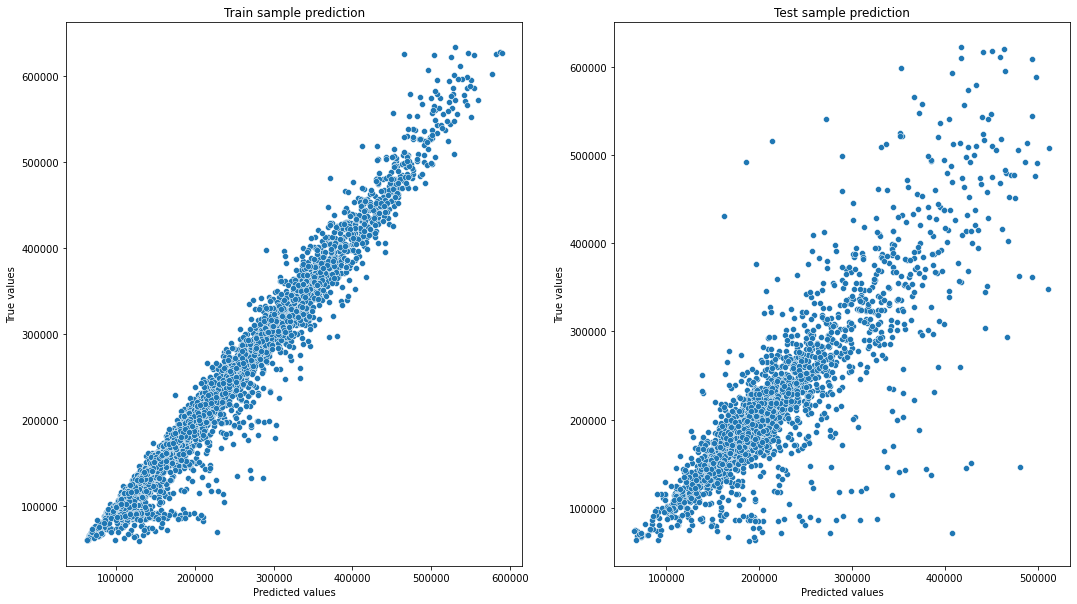

In [248]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(Y_train, y_train_preds, Y_test, y_test_preds)

Берем файлик для теста и проделываем все то же самое


In [256]:
X_test = pd.read_csv(os.path.join(data_path, test_file))
X_test = dummy_maker(X_test)
X_test = dropper(X_test, ['Healthcare_1'])
X_test['LifeSquare'].fillna(X_train['LifeSquare'].mean(), inplace=True)
X_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0
2,960,27,2.0,59.463678,37.553824,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1
4,746,74,1.0,53.837056,37.553824,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,1,1,31,6119,4,1,2,1
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,0,7,1
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,2,5,1
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,0,11,1


In [257]:
y_test_pred = rf_model.predict(X_test)

Делаем табличку результата

In [260]:
sample_df = pd.read_csv(os.path.join(data_path, sample))
sample_df

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0
...,...,...
4995,10379,200000.0
4996,16138,200000.0
4997,3912,200000.0
4998,5722,200000.0


In [261]:
sample_df['Price'] = y_test_pred
sample_df

,Id,Price
0,4567,159820.110160
1,5925,117783.594537
2,960,140727.800212
3,3848,126419.538322
4,746,200625.456602
...,...,...
4995,10379,183595.581288
4996,16138,423726.237231
4997,3912,147207.710815
4998,5722,183564.803140


In [262]:
sample_df.to_csv(os.path.join(data_path, 'rf_submit.csv'), index=False)